In [9]:
from ultralytics import YOLO

model = YOLO('./best.pt')

#model.train(data='./data.yaml',pretrained = False, save_json = True, epochs=200)


image 1/1 /home/jhchoi/Food-Volume-Estimation/Volume Estimation/train/images/IMG_5809_jpeg.rf.61e70cdc7fd3b0a7ed62145499d0edc5.jpg: 640x640 1 bulgogi, 1 kimchi, 2 meats, 1 noodle, 1 plate, 1 rice, 1 tofu, 3.7ms
Speed: 3.5ms preprocess, 3.7ms inference, 223.7ms postprocess per image at shape (1, 3, 640, 640)
(640, 640, 3)


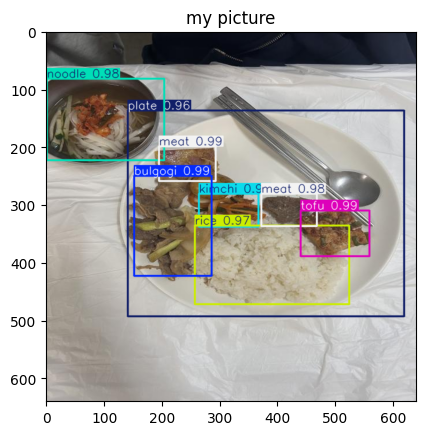

In [10]:
import cv2
from matplotlib import pyplot as plt
from ultralytics import YOLO

results = model('./train/images/IMG_5809_jpeg.rf.61e70cdc7fd3b0a7ed62145499d0edc5.jpg') # conf=0.2, iou ..

plots = results[0].plot()
print(plots.shape)
plt.imshow(cv2.cvtColor(plots, cv2.COLOR_BGR2RGB))
plt.title('my picture')
plt.show()

In [11]:
import cv2
import json
import numpy as np
import os
from ultralytics import YOLO

# YOLO 모델 로드
#model = YOLO('yolov8n.pt')  # 원하는 YOLO 모델 경로
class_list = ['bulgogi', 'kimchi', 'meat', 'noodle', 'plate', 'potato', 'pumpkin', 'rice', 'salad', 'scramble', 'soup', 'tofu']
# 테스트 이미지 로드
image_path = './train/images/IMG_5809_jpeg.rf.61e70cdc7fd3b0a7ed62145499d0edc5.jpg'
image = cv2.imread(image_path)

# 객체 탐지
results = model(image)

# LabelMe 형식의 JSON 구조 초기화
labelme_data = {
    "version": "4.5.6",
    "flags": {},
    "shapes": [],
    "imagePath": os.path.basename(image_path),
    "imageData": None,
    "imageHeight": image.shape[0],
    "imageWidth": image.shape[1]
}

# 타원 점 생성 함수
def generate_ellipse_points(center, axes, num_points=20):
    points = []
    for i in range(num_points):
        theta = 2 * np.pi * i / num_points  # 각도 계산
        x = center[0] + axes[0] * np.cos(theta)  # x 좌표
        y = center[1] + axes[1] * np.sin(theta)  # y 좌표
        points.append([int(x), int(y)])
    return points

# 탐지된 객체에 대한 정보 저장
for result in results:
    boxes = result.boxes.xyxy  # 탐지된 객체의 경계 상자
    scores = result.boxes.conf  # 탐지 신뢰도
    classes = result.boxes.cls  # 클래스 정보

    for box, score, cls in zip(boxes, scores, classes):
        if score > 0.8:  # 신뢰도가 0.5 이상인 경우에만 저장
            # 타원의 중심과 반지름 설정
            center = [(box[0] + box[2]) / 2, (box[1] + box[3]) / 2]  # 경계 상자 중심
            axes = [(box[2] - box[0]) / 2, (box[3] - box[1]) / 2]  # 반지름

            points = generate_ellipse_points(center, axes)  # 타원 점 생성

            shape = {
                "label": class_list[int(cls)],  # 클래스 ID (필요에 따라 클래스 이름으로 변경 가능)
                "points": points,
                "group_id": None,
                "shape_type": "polygon",
                "flags": {}
            }
            labelme_data["shapes"].append(shape)

# JSON 파일로 저장
output_json_path = 'labelme_annotations_ellipse.json'
with open(output_json_path, 'w') as json_file:
    json.dump(labelme_data, json_file, indent=4)

print(f"LabelMe format results with ellipse points saved to {output_json_path}")


0: 640x640 1 bulgogi, 1 kimchi, 2 meats, 1 noodle, 1 plate, 1 rice, 1 tofu, 6.4ms
Speed: 1.5ms preprocess, 6.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
LabelMe format results with ellipse points saved to labelme_annotations_ellipse.json


In [16]:
import os
os.system("python3 demo.py")


0: 640x640 1 bulgogi, 1 kimchi, 2 meats, 1 noodle, 1 plate, 1 rice, 1 tofu, 3.8ms
Speed: 4.9ms preprocess, 3.8ms inference, 241.0ms postprocess per image at shape (1, 3, 640, 640)


/home/jhchoi/Food-Volume-Estimation/Volume Estimation/demo_transform.py:94: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
/home/jhchoi/.local/lib/python3.10/site-packages/torch/nn/functional.py:3809: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


LabelMe format results with ellipse points saved to labelme_annotations_ellipse.json
Volume:
{'tofu': 30.193733172966002, 'bulgogi': 37.28817762435406, 'meat': 11.071265899516591, 'noodle': 1.2740894659331259, 'rice': 120.76444003079575, 'kimchi': 9.329633840334843}
unit: cm^3
{'Carbohydrate': 14.713710386699653, 'Protein': 19.24662277595612, 'Fat': 14.41164921981943, 'Sodium': 1772.6613098703413, 'calories': 265.54617562899796}


0

Text(0.5, 1.0, 'my picture')

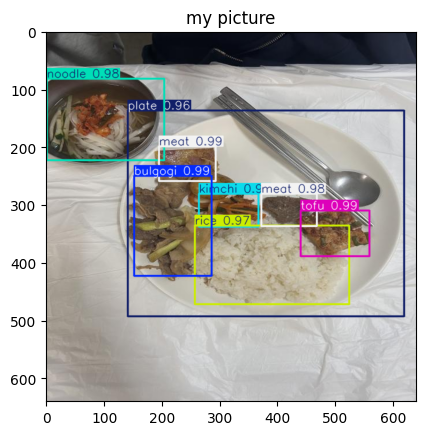

In [20]:
plt.imshow(cv2.cvtColor(plots, cv2.COLOR_BGR2RGB))
plt.title('my picture')

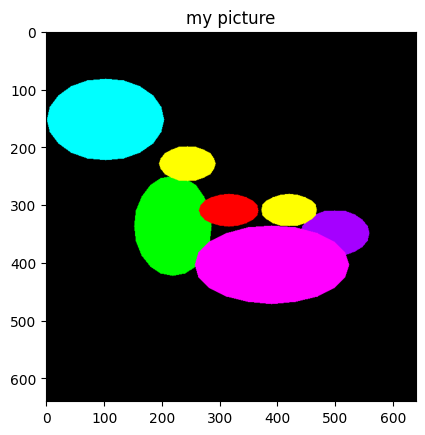

In [19]:
image = cv2.imread("./output/mask.png")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('with high reliability of Segmentation section')
plt.show()